<a href="https://colab.research.google.com/github/GiriSriramula/GiriSriramula/blob/main/DL_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prepare two python notebooks (recommended- use Google Colab) to build, train and evaluate a deep neural network on the two datasets given below (tensorflow or tensorflow.keras library recommended). Read the instructions carefully.

 

Question No.1. Vision Dataset: The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). There are 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal). Please find your dataset from the link - https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia (Links to an external site.)     (6 marks)

 

    Import Libraries/Dataset (0 mark)
        Import the required libraries and the dataset (use Google Drive if required).
        Check the GPU available (recommended- use free GPU provided by Google Colab).

 

    Data Visualization and augmentation (1 mark)
        Plot at least two samples from each class of the dataset (use matplotlib/seaborn/any other library).
        Apply rotation and height shift augmentation (rotation_range, height_shift_range)to the dataset separately. Print the augmented image and the original image for each class and each augmentation.
        Bring the train and test data in the required format.
        Print the shapes of train and test data.

 

    Model Building (0.2*5 = 1 mark)
        Sequential Model layers- Use AT LEAST 3 hidden layers with appropriate input for each. Choose the best number for hidden units and give reasons.
        Add L2 regularization to all the layers.
        Add one layer of dropout at the appropriate position and give reasons.
        Choose the appropriate activation function for all the layers.
        Print the model summary.

 

    Model Compilation (0.25 mark)
        Compile the model with the appropriate loss function.
        Use an appropriate optimizer. Give reasons for the choice of learning rate and its value.
        Use accuracy as a metric.

 

    Model Training (0.5 + 0.25 = 0.75 mark)
        Train the model for an appropriate number of epochs. Print the train and validation accuracy and loss for each epoch. Use the appropriate batch size.
        Plot the loss and accuracy history graphs for both train and validation set. Print the total time taken for training.

 

    Model Evaluation (0.5 + 0.5 = 1 mark)
        Print the final train and validation loss and accuracy. Print confusion matrix and classification report for the validation dataset. Analyse and report the best and worst performing class.
        Print the two most incorrectly classified images for each class in the test dataset.

 

Hyperparameter Tuning- Build two more additional models by changing the following hyperparameters ONE at a time. Write the code for Model Building, Model Compilation, Model Training and Model Evaluation as given in the instructions above for each additional model. (1 + 1 = 2 marks)

    Optimiser: Use a different optimizer with the appropriate LR value.
    Network Depth: Change the number of hidden layers and hidden units for each layer.

Write a comparison between each model and give reasons for the difference in results.

 

Question No.2. Dataset: data1_0.5.csv Download data1_0.5.csv

 
1. Load the attached csv file in python. Each row consists of feature 1, feature 2, & class label.

 
2. Train two single/double hidden layer deep networks by varying the number of hidden nodes (4, 8, 12, 16) in each layer with 70% training and 30% validation data. Use appropriate learning rate, activation, and loss functions and also mention the reason for choosing the same. Report, compare, and explain the observed accuracy and minimum loss achieved. [0.5+1 mark]

 
3. Visually observe the dataset and design an appropriate feature transformation (derived feature) such that after feature transformation, the dataset can be classified using a minimal network architecture (minimum number of parameters). Design, train this minimal network, and report training and validation errors, and trained parameters of the network. Use 70% training and 30% validation data, appropriate learning rate, activation and loss functions. Explain the final results. [1+1+0.5 marks]

 


##Import Libraries/Datasets from Kaggle

In [ ]:
#install kaggle
!pip install -q kaggle

In [ ]:
#import files to google colab with kaggle credentials
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"syadgiri","key":"0f8fc9d49fee936382ab4885b09dd671"}'}

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
#copy the kaggle json file into this location
! cp kaggle.json ~/.kaggle/

In [ ]:
#change the credentials to json file
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#download the datase from kaggle to goocle colab
! kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

chest-xray-pneumonia.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#unzip the databse 
! unzip chest-xray-pneumonia.zip

Archive:  chest-xray-pneumonia.zip
replace chest_xray/__MACOSX/._chest_xray? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

GPU  Availability checking

In [ ]:
!pip install GPUtil

In [ ]:
import GPUtil as GPU
import tensorflow as tf
GPU.getAvailable #This is to check the availability of GPU in Google Colab.
tf.test.gpu_device_name()

''

In [ ]:
import torch
use_cuda = torch.cuda.is_available
print(use_cuda)

<function is_available at 0x7feab23b4f80>


##Data visualization and augmentation

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
#tensorflow and keras
#!pip install tensorflow

from keras.preprocessing.image import ImageDataGenerator

# folder
import cv2
import os
import PIL

#import image
from PIL import Image

# for DNN

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers

import random

In [ ]:
# useful variables
train_dir = '/content/chest_xray/chest_xray/train'

# Path to validation directory
val_dir = '/content/chest_xray/chest_xray/val'

# Path to test directory
test_dir = '/content/chest_xray/chest_xray/test'

In [ ]:
train_datagen = ImageDataGenerator(rotation_range = 20, width_shift_range = 0.3,
                                   validation_split = 0.1)


In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size = (224,224), class_mode = 'sparse',
                                                    subset = 'training', shuffle = True)


Found 4695 images belonging to 2 classes.


In [ ]:
import pathlib
data_dir = pathlib.Path('/content/chest_xray/')
data_dir

PosixPath('/content/chest_xray')

In [ ]:
list(data_dir.glob('*/*/*.jpeg'))

In [ ]:
len(list(data_dir.glob('*/*/*.jpeg')))

5856

In [ ]:
normal = list(data_dir.glob('*/NORMAL/*.jpeg'))
normal[:]

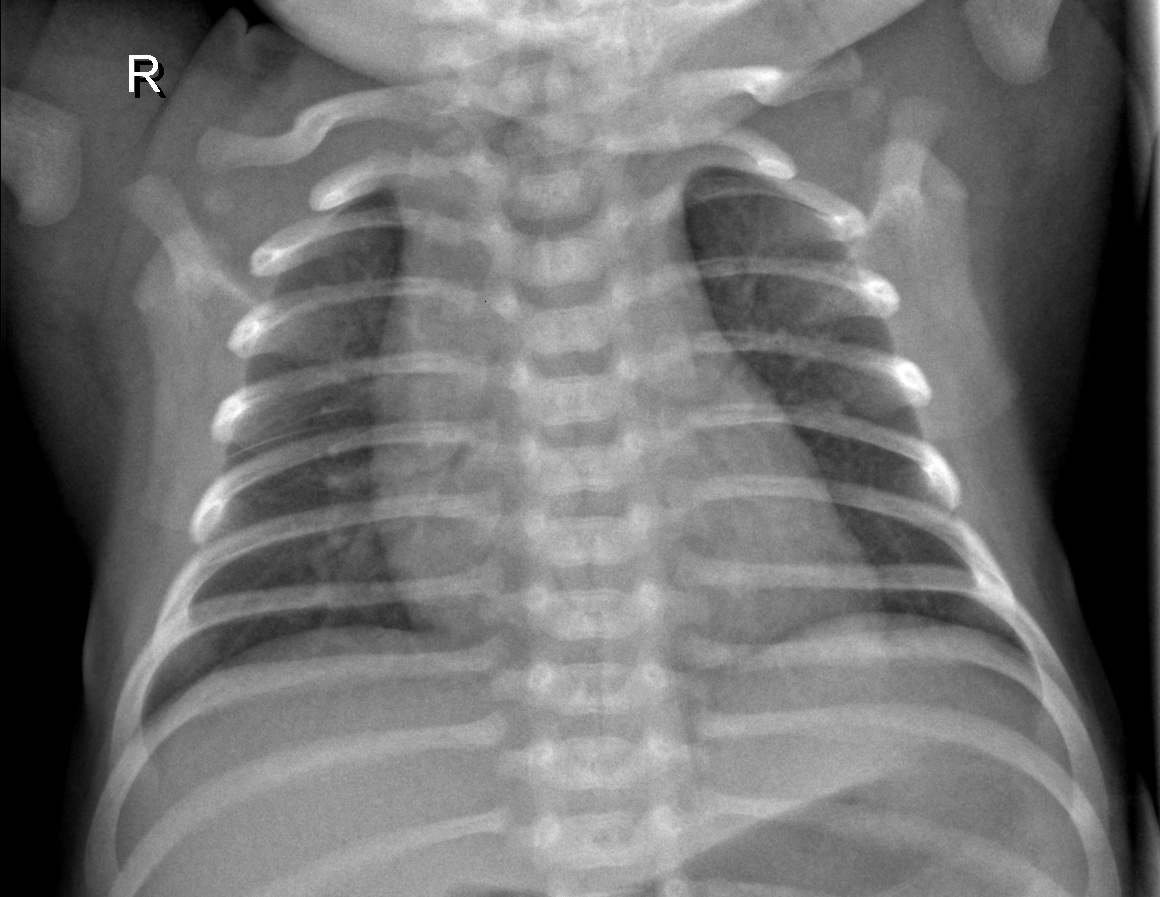

In [ ]:
PIL.Image.open(str(normal[1]))

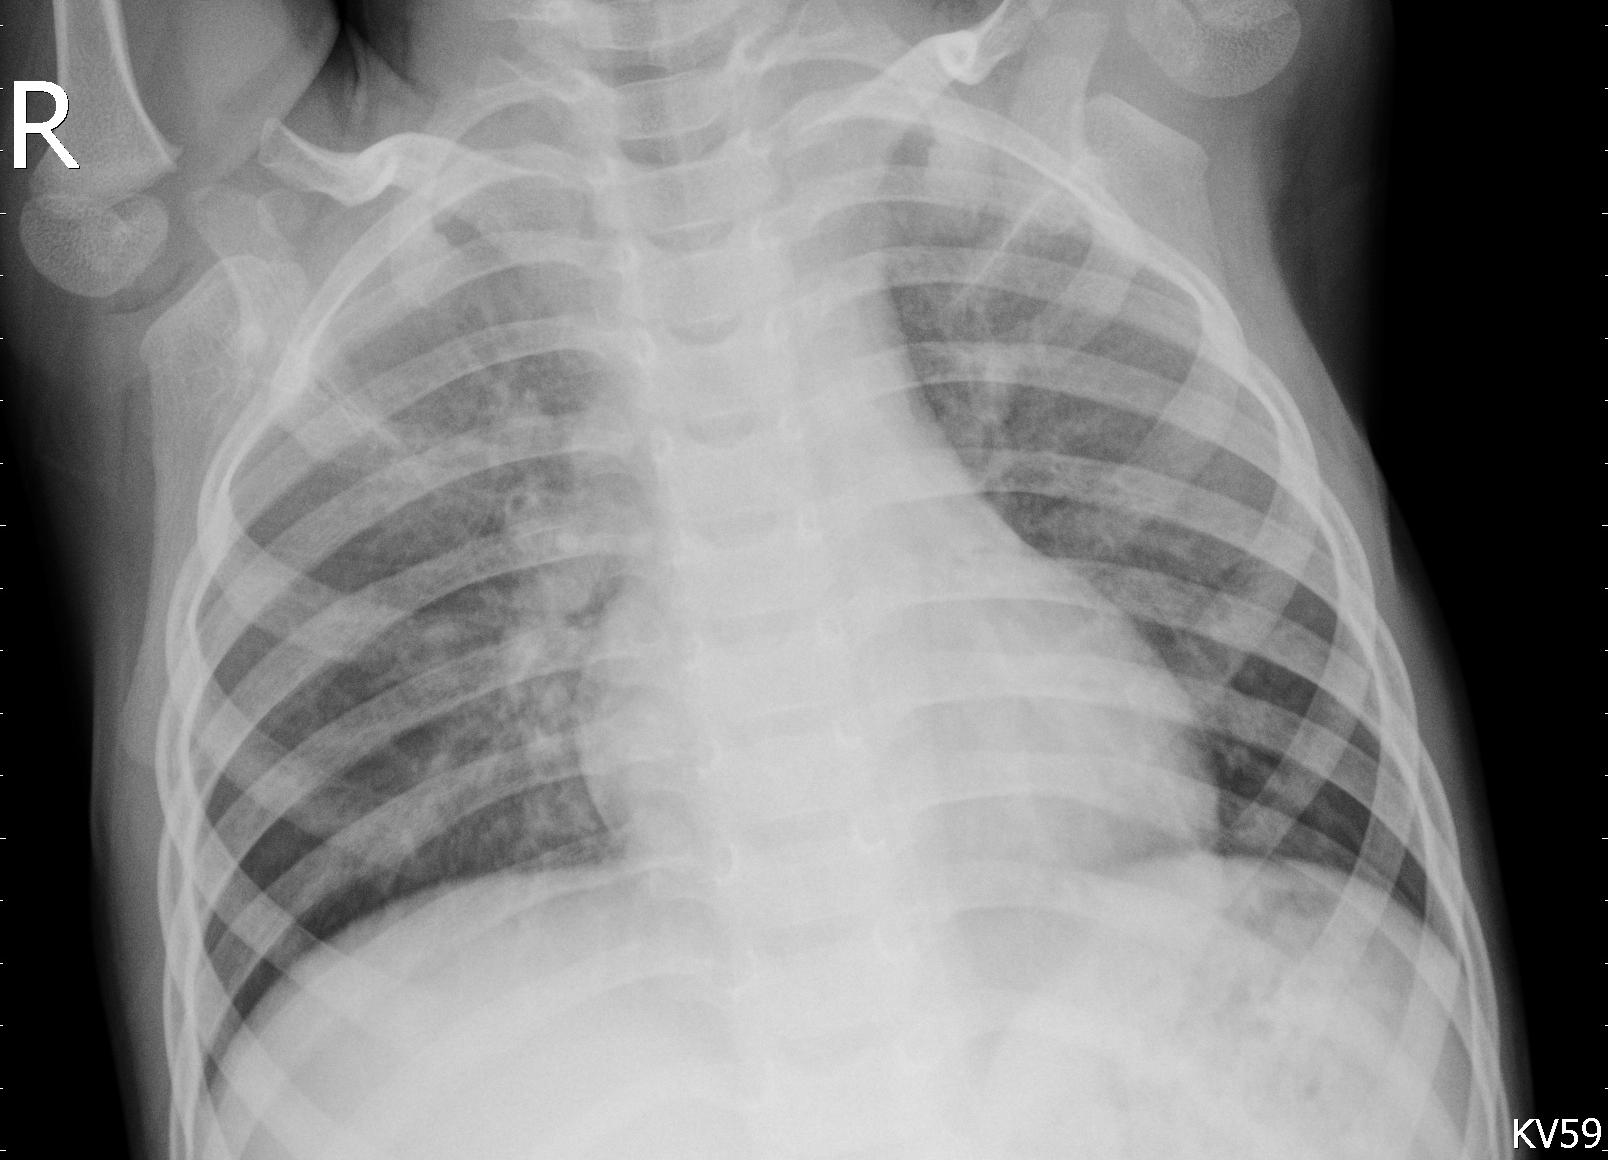

In [ ]:
pneumonia = list(data_dir.glob('*/PNEUMONIA/*.jpeg'))
pneumonia[:]
PIL.Image.open(str(pneumonia[1]))

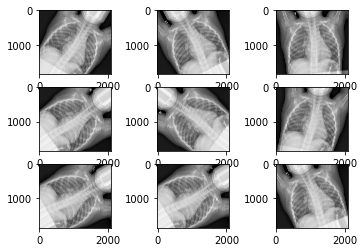

In [ ]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
img = load_img('/content/chest_xray/train/NORMAL/IM-0115-0001.jpeg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=90)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

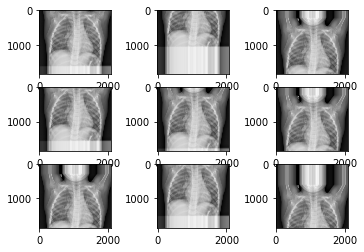

In [ ]:
# example of height shift image augmentation
# load the image
img = load_img('/content/chest_xray/train/NORMAL/IM-0115-0001.jpeg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(height_shift_range=0.5)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1/255.)
val_image_generator = ImageDataGenerator(rescale=1/255.)

In [ ]:
BATCH_SIZE = 32
IMG_SIZE = 224

In [ ]:
train_gen = train_image_generator.flow_from_directory(batch_size = BATCH_SIZE,
                                                directory= train_dir,
                                                shuffle = True,
                                                target_size = (IMG_SIZE, IMG_SIZE))

Found 5216 images belonging to 2 classes.


In [ ]:
val_gen = val_image_generator.flow_from_directory(batch_size = BATCH_SIZE,
                                                directory= val_dir,
                                                target_size = (IMG_SIZE, IMG_SIZE))

Found 16 images belonging to 2 classes.


In [ ]:
test_gen = val_image_generator.flow_from_directory(batch_size = BATCH_SIZE,
                                                directory= test_dir,
                                                shuffle = True,
                                                target_size = (IMG_SIZE, IMG_SIZE))

Found 624 images belonging to 2 classes.


In [ ]:
for item in train_gen:
    images,labels = item
    print(images.shape)
    print(labels.shape)
    break

(32, 224, 224, 3)
(32, 2)


In [ ]:
#Dataset is imbalanced and small
vgg = tf.keras.applications.VGG16(include_top = False, 
                                  weights='imagenet', 
                                  input_shape = (IMG_SIZE, IMG_SIZE, 3))
resnet50v2 = tf.keras.applications.ResNet50V2(include_top = False, 
                                  weights='imagenet', 
                                  input_shape = (IMG_SIZE, IMG_SIZE, 3))

94683136/94668760 [==============================] - 1s 0us/step


## **DNN ModelBuilding **

Sequential Model with 3 hiden layers with L2 regularization and a output layer. added a dropout of 0.5 after second hidden layer.


choosen Dropout layer in middle as if we apply Droupout early then it may be possible that we can loose important information/paterrn which can helpful in good accuracy. So used to apply at middle and performance also increased with the same

In [ ]:
model  = tf.keras.Sequential([
        resnet50v2,
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256,input_dim=128, activation='relu', kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l2(0.01)),  # hidden layer 1 with L2 regularization
        tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l2(0.01)), # hidden layer 2 with L2 regularization
        tf.keras.layers.Dropout(0.5),#dropout of 50 percent
        tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01), 
                activity_regularizer=regularizers.l2(0.01)), # hidden layer 3 with L2 regularization
        tf.keras.layers.Dense(2, activation='softmax')
])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 256)               25690368  
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 2)                 1

## Model Compilation


In [ ]:
# Configure  the model for training, by using appropriate optimizers and regularizations
# Available optimizer: adam, rmsprop, adagrad, sgd
# loss:  objective that the model will try to minimize. 
# Available loss: categorical_crossentropy, binary_crossentropy, mean_squared_error
# metrics: List of metrics to be evaluated by the model during training and testing. 
        
model.compile(loss='categorical_crossentropy', 
              metrics=[
                  tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                  tf.keras.metrics.Precision(name='precision'),
                  tf.keras.metrics.Recall(name='recall'),
              ], 
              optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-4))

#Model Training

In [ ]:
# train the model with training data set
time_s = time.time()
history = model.fit(train_gen, epochs=3, validation_data=val_gen)
t1 = (time.time() - time_s)
print("Time taken to build model: %s seconds" %(t1))

Epoch 1/3
163/163 [==============================] - 3042s 19s/step - loss: 5.2316 - accuracy: 0.8637 - precision: 0.8637 - recall: 0.8637 - val_loss: 4.4614 - val_accuracy: 0.6250 - val_precision: 0.6250 - val_recall: 0.6250
Epoch 2/3
 29/163 [====>.........................] - ETA: 41:50 - loss: 3.8314 - accuracy: 0.9871 - precision: 0.9871 - recall: 0.9871

In [ ]:
print('Final training loss \t', history.history['loss'][-1])
print('Final training accuracy ', history.history['accuracy'][-1])

In [ ]:
# plot the training loss

plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Training Loss')
plt.legend()
plt.show()

In [ ]:
# plot the training accuracy

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Training Accuracy')
plt.legend()
plt.show()

## Model Evaluation

In [ ]:
T1A = model.evaluate_generator(test_gen, workers =1 )
print("Test Accuracy = ", scores[1])
print("Test Loss = ", scores[0])


In [ ]:
V1A = model.evaluate_generator(val_gen)
print("Validation Accuracy = ", scores1[1])
print("Validation Loss = ", scores1[0])

## Hyperparameter Tuning


Creating multiple models

Model 1 Reducing the layers to 2 and using the SGD obtimizer and having lesser nodes

In [ ]:
model1  = tf.keras.Sequential([
        resnet50v2,
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128,input_dim=128, activation='relu', kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l2(0.01)),  # hidden layer 1 with L2 regularization
        tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l2(0.01)), # hidden layer 2 with L2 regularization
       tf.keras.layers.Dense(2, activation='softmax')
])
model1.summary()

In [ ]:
model1.compile(loss='categorical_crossentropy', 
              metrics=[
                  tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                  tf.keras.metrics.Precision(name='precision'),
                  tf.keras.metrics.Recall(name='recall'),
              ], 
              optimizer = tf.keras.optimizers.SGD(learning_rate = 0.0001))

In [ ]:
time_s = time.time()
history1 = model1.fit(train_gen, epochs=3, validation_data=val_gen)
t2 = (time.time() - time_s)
print("Time taken to build model: %s seconds" %(t2))

In [ ]:
T2A = model1.evaluate_generator(test_gen, workers =1 )
print("Test1 Accuracy = ", T2A[1])
print("Test1 Loss = ", T2A[0])

In [ ]:
V2A = model1.evaluate_generator(val_gen)
print("Validation Accuracy = ", V2A[1])
print("Validation Loss = ", V2A[0])

Model 2 increasing the layers to 4 and using the SGD obtimizer and having more nodes

In [ ]:
model2  = tf.keras.Sequential([
        resnet50v2,
        tf.keras.layers.Dense(256,input_dim=128, activation='relu', kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l2(0.01)),  # hidden layer 1 with L2 regularization
        tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l2(0.01)), # hidden layer 2 with L2 regularization
        tf.keras.layers.Dropout(0.5),#dropout of 50 percent
        tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01), 
                activity_regularizer=regularizers.l2(0.01)), # hidden layer 3 with L2 regularization
        tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01), 
                activity_regularizer=regularizers.l2(0.01)), # hidden layer 3 with L2 regularization
        tf.keras.layers.Dense(2, activation='softmax')
])
model2.summary()

In [ ]:
model2.compile(loss='categorical_crossentropy', 
              metrics=[
                  tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                  tf.keras.metrics.Precision(name='precision'),
                  tf.keras.metrics.Recall(name='recall'),
              ], 
              optimizer = tf.keras.optimizers.SGD(learning_rate = 0.0001))

In [ ]:
time_s = time.time()
history1 = model2.fit(train_gen, epochs=3, validation_data=val_gen)
t3 = (time.time() - time_s)
print("Time taken to build model: %s seconds" %(t3))

In [ ]:
T3A = model2.evaluate_generator(test_gen, workers =1 )
print("Test1 Accuracy = ", T3A[1])
print("Test1 Loss = ", T3A[0])

In [ ]:
V3A = model2.evaluate_generator(val_gen)
print("Validation Accuracy = ", V3A[1])
print("Validation Loss = ", V3A[0])

In [ ]:
results = pd.DataFrame(columns=['Model', 'TestAccuracy', 'TestLoss', 'Validation Accuracy', 'validation loss','Build Time'])
results.loc[0] = ['3 Layer Fully Connected',T1A[1],T1A[0],V1A[1],V1A[0],t1]
results.loc[1] = ['With Reduced layers and dropouts ',T2A[1],T2A[0],V2A[1],V2A[0],t2]
results.loc[2] = ['With increased layers ',T3A[1],T3A[0],V3A[1],V3A[0],t3]
results